#TASK-1

In [63]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
import io
import base64
import pdfcrowd


In [2]:
name_basics = pd.read_csv('D:/DataScience_2019501071/DADV/Assignment/IMDB/name.basics.tsv',sep = "\t")
title_basics = pd.read_csv('D:/DataScience_2019501071/DADV/Assignment/IMDB/title.basics.tsv', sep = "\t")
title_ratings = pd.read_csv('D:/DataScience_2019501071/DADV/Assignment/IMDB/title.ratings.tsv', sep = "\t")

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1711
1,tt0000002,6.0,211
2,tt0000003,6.5,1471
3,tt0000004,6.1,124
4,tt0000005,6.2,2273


In [5]:
temp1 = title_basics[title_basics["startYear"] != "\\N"]
temp1 = temp1.astype({"startYear":"int"})
temp1.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear          int32
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [6]:
solution = pd.merge(temp1,title_ratings,on="tconst")
solution.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1711
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,211
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1471
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.1,124
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2273


#Find the 20 most popular movies with a rank more than 8.0

In [7]:
temp2 = solution[(solution['averageRating'] > 8.0) & (solution["titleType"] == 'movie')]
final_solution= temp2.sort_values(by=["numVotes"],ascending=False)

In [21]:
final_solution.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
82045,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,Drama,9.3,2407288
248072,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2366617
606271,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2124030
98445,tt0137523,movie,Fight Club,Fight Club,0,1999,\N,139,Drama,8.8,1900148
81828,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,"Crime,Drama",8.9,1869829
80954,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,\N,142,"Drama,Romance",8.8,1860043
96318,tt0133093,movie,The Matrix,The Matrix,0,1999,\N,136,"Action,Sci-Fi",8.7,1717389
89826,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Action,Adventure,Drama",8.8,1699249
113419,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",8.9,1678353
45858,tt0068646,movie,The Godfather,The Godfather,0,1972,\N,175,"Crime,Drama",9.2,1665958


#Find the 20 best rated movies with over 40,000 votes in the 2000s (year >= 2000)


In [8]:
movies_40k = solution[(solution["numVotes"] >= 40000) & (solution["startYear"] >= 2000) & (solution["titleType"] == 'movie')]
final_result= movies_40k.sort_values(by = 'averageRating', ascending = False)

In [9]:
final_result.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
792688,tt2592910,movie,CM101MMXI Fundamentals,CM101MMXI Fundamentals,0,2013,\N,139,"Comedy,Documentary",9.2,44312
451044,tt10189514,movie,Soorarai Pottru,Soorarai Pottru,0,2020,\N,153,Drama,9.1,83037
248072,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,\N,152,"Action,Crime,Drama",9.0,2366617
113419,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama",8.9,1678353
89826,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Action,Adventure,Drama",8.8,1699249
606271,tt1375666,movie,Inception,Inception,0,2010,\N,148,"Action,Adventure,Sci-Fi",8.8,2124030
113420,tt0167261,movie,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,0,2002,\N,179,"Action,Adventure,Drama",8.7,1517535
986039,tt5813916,movie,The Mountain II,Dag II,0,2016,\N,135,"Action,Drama,War",8.7,106177
150193,tt0245429,movie,Spirited Away,Sen to Chihiro no kamikakushi,0,2001,\N,125,"Adventure,Animation,Family",8.6,674607
185184,tt0317248,movie,City of God,Cidade de Deus,0,2002,\N,130,"Crime,Drama",8.6,711327


#TASK-2 

#Analysis

In [10]:
import pandas as pd 
import numpy as np
import re
from matplotlib import pyplot as plt

#Using the IMDb Movie Rating Data

In [11]:
title_basics = pd.read_csv('D:/DataScience_2019501071/DADV/Assignment/IMDB/title.basics.tsv', sep = "\t")
title_ratings = pd.read_csv('D:/DataScience_2019501071/DADV/Assignment/IMDB/title.ratings.tsv', sep = "\t")

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#convert it into a CSV file

In [12]:
title_basics.to_csv('title.basics.csv')
title_ratings.to_csv('title.ratings.csv')


In [13]:
title_basics.dtypes

tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           object
startYear         object
endYear           object
runtimeMinutes    object
genres            object
dtype: object

In [14]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [15]:
title_basics["runtimeMinutes"] = pd.to_numeric(title_basics["runtimeMinutes"], errors="coerce")
title_basics["startYear"] = pd.to_numeric(title_basics["startYear"], errors="coerce")
title_basics["endYear"] = pd.to_numeric(title_basics["endYear"], errors="coerce")
title_basics = title_basics.astype({"isAdult" : bool})

#find the average rank of the 10 most popular movies between 2000-2009 (inclusive)


In [16]:
movies = solution[solution["titleType"] == "movie"]
movies1 = movies[(movies["startYear"] >= 2000) & (movies["startYear"] <= 2009)]
movies1 = movies1.sort_values(by = ['averageRating','numVotes'], ascending = False)
print(movies1.averageRating.iloc[0:9].mean())

9.88888888888889


#find the year in the 1900s when the average rank increased the most, compared to the previous year.(Ignore movies with votes &lt; 1000)

In [17]:
movies1 = movies[(movies["startYear"] >= 1900) & (movies["startYear"] <= 2000)]
movies1= movies1[movies1["numVotes"] >= 1000]
movies1= movies1.sort_values(by="startYear")
movies1.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
994,tt0002130,movie,Dante's Inferno,L'Inferno,0,1911,\N,71,"Adventure,Drama,Fantasy",7.0,2479
1187,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0,1913,\N,54,"Crime,Drama",7.0,2058
1217,tt0003014,movie,Ingeborg Holm,Ingeborg Holm,0,1913,\N,96,Drama,7.0,1055
1222,tt0003037,movie,Fantomas: The Man in Black,Juve contre Fantômas,0,1913,\N,61,"Crime,Drama",7.0,1416
1243,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0,1913,\N,90,"Crime,Drama,Mystery",7.0,1103


In [18]:
movies_total_avg_rank = movies1.groupby(["startYear"]).mean()
movies_total_avg_rank

,averageRating,numVotes
startYear,,
1911,7.000000,2479.000000
1913,6.900000,1503.400000
1914,6.560000,2044.400000
1915,6.780000,6438.400000
1916,6.950000,8041.000000
...,...,...
1996,6.334663,27835.137157
1997,6.418018,37028.731982
1998,6.430152,36160.006508


In [19]:
movies_total_avg_rank["increased_rank"] = movies_total_avg_rank["averageRating"] - movies_total_avg_rank["averageRating"].shift(1)
movies_total_avg_rank

,averageRating,numVotes,increased_rank
startYear,,,
1911,7.000000,2479.000000,NaN
1913,6.900000,1503.400000,-0.100000
1914,6.560000,2044.400000,-0.340000
1915,6.780000,6438.400000,0.220000
1916,6.950000,8041.000000,0.170000
...,...,...,...
1996,6.334663,27835.137157,-0.075493
1997,6.418018,37028.731982,0.083355
1998,6.430152,36160.006508,0.012134


In [20]:
result= movies_total_avg_rank.sort_values(by="increased_rank",ascending=False)
result.head(1)

,averageRating,numVotes,increased_rank
startYear,,,
1919,6.946154,2036.538462,0.296154


#find the expected average rank for 2013 using linear regression. How good is this regression? (Ignore movies with votes &lt; 1000.)

In [21]:
movies_Votes = movies[movies['numVotes'] >= 1000]
movies_total_avg_rank = movies_Votes.groupby(["startYear"]).mean()
movies_total_avg_rank.index

Int64Index([1911, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
            ...
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='startYear', length=110)

In [22]:
movies_total_avg_rank.reset_index(level = 0, inplace = True)
movies_total_avg_rank

,startYear,averageRating,numVotes
0,1911,7.000000,2479.000000
1,1913,6.900000,1503.400000
2,1914,6.560000,2044.400000
3,1915,6.780000,6438.400000
4,1916,6.950000,8041.000000
...,...,...,...
105,2017,6.179649,20822.278963
106,2018,6.257435,18904.468922
107,2019,6.251260,20286.033884
108,2020,6.138146,12638.109934


In [23]:
result=movies_total_avg_rank[movies_total_avg_rank['startYear'] == 2013]
result

,startYear,averageRating,numVotes
101,2013,6.204307,32726.385135


In [24]:
from sklearn.linear_model import LinearRegression

In [29]:
LinearModel = LinearRegression()

In [30]:
m = np.array(movies_total_avg_rank['numVotes']).reshape(-1, 1)
n = movies_total_avg_rank['averageRating']
LinearModel.fit(m,n)

LinearRegression()

In [31]:
movies_2k13 = movies_Votes[(movies["startYear"] == 2013) & (movies['numVotes'] >= 1000)]
movies_2k13

<ipython-input-31-2ad23a216cdf>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies_2k13 = movies_Votes[(movies["startYear"] == 2013) & (movies['numVotes'] >= 1000)]


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
202082,tt0359950,movie,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,0,2013,\N,114,"Adventure,Comedy,Drama",7.3,298720
224153,tt0409379,movie,In Secret,In Secret,0,2013,\N,107,"Crime,Drama,Thriller",6.1,7922
242409,tt0453562,movie,42,42,0,2013,\N,128,"Biography,Drama,Sport",7.5,88621
246507,tt0463960,movie,The Devil You Know,The Devil You Know,0,2013,\N,76,"Mystery,Thriller",3.4,1637
248233,tt0469021,movie,Alan Partridge,Alan Partridge: Alpha Papa,0,2013,\N,90,"Action,Comedy,Crime",6.9,30194
...,...,...,...,...,...,...,...,...,...,...,...
861799,tt3663040,movie,Heatstroke,Heatstroke,0,2013,\N,92,"Action,Thriller",4.8,2933
865765,tt3720788,movie,The Disappearance of Eleanor Rigby: Her,The Disappearance of Eleanor Rigby: Her,0,2013,\N,100,"Drama,Romance",6.9,8831
887500,tt4097826,movie,The Firefly,La luciérnaga,0,2013,\N,85,"Drama,Fantasy,Romance",6.1,1147
887620,tt4103686,movie,City of God: 10 Years Later,Cidade de Deus: 10 Anos Depois,0,2013,\N,70,Documentary,6.4,1203


In [32]:
movies_avg = movies_2k13.mean()
movies_avg['numVotes']

32726.385135135137

In [45]:
movies_avg_numVotes = movies_avg['numVotes'].reshape(1,-1)
LinearModel.predict(movies_avg_numVotes)

array([6.3034945])

#find the correlation between rank and votes for each year in the 1900s. By how much did the correlation coefficient grow each year? How good is this regression?

In [47]:
movies1["averageRating"].corr(movies1["numVotes"])

0.19034046411905498

In [49]:
groupby_year = movies1.groupby(by="startYear")
years = groupby_year.groups.keys()
yearly_correlation = {}
for year in years:
    year_group = groupby_year.get_group(year)
    yearly_correlation[year] = year_group["averageRating"].corr(year_group["numVotes"])
yearly_correlation = pd.DataFrame(yearly_correlation.items(),columns=["year","correlation"])
yearly_correlation.sort_values(by="year")
yearly_correlation

C:\Python38\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Python38\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,year,correlation
0,1911,NaN
1,1913,-0.470510
2,1914,0.285393
3,1915,-0.651875
4,1916,1.000000
...,...,...
84,1996,0.200804
85,1997,0.232725
86,1998,0.245470
87,1999,0.250131


#TASK-3

#Draw a scatterplot of rank vs votes for every movie with at least 10,000 votes. (x-axis=votes, y-axis=rank)

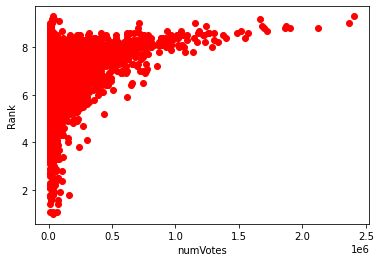

In [50]:
movies1= movies[movies["numVotes"] >= 10000]
plt.scatter(movies1["numVotes"],movies1["averageRating"],color = "r")
plt.xlabel("numVotes")
plt.ylabel("Rank")
plt.show()

#TASK-4

#Using Tornado templates,Draw bar graph of the number of movies by year since 1900

In [51]:
import io

In [52]:
movies_1900 = movies[movies['startYear'] >= 1900]
movies_1900

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
340,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N,4.5,8
374,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography",6.1,637
383,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama,5.2,6
398,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama,4.5,14
406,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama,3.8,12
...,...,...,...,...,...,...,...,...,...,...,...
1163978,tt9916190,movie,Safeguard,Safeguard,0,2020,\N,90,"Action,Adventure,Thriller",3.5,139
1163984,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,\N,84,Thriller,5.8,1075
1163987,tt9916362,movie,Coven,Akelarre,0,2020,\N,92,"Adventure,Drama,History",6.3,3401
1163990,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,\N,\N,"Adventure,History,War",3.8,12


In [53]:
movies_count = movies_1900.groupby(['startYear']).count()
movies_count

,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
startYear,,,,,,,,,,
1900,2,2,2,2,2,2,2,2,2,2
1901,1,1,1,1,1,1,1,1,1,1
1902,1,1,1,1,1,1,1,1,1,1
1903,1,1,1,1,1,1,1,1,1,1
1904,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
2017,9746,9746,9746,9746,9746,9746,9746,9746,9746,9746
2018,9616,9616,9616,9616,9616,9616,9616,9616,9616,9616
2019,9341,9341,9341,9341,9341,9341,9341,9341,9341,9341


In [54]:
movies_count.reset_index(level=0, inplace=True)
movies_count

,startYear,tconst,titleType,primaryTitle,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
0,1900,2,2,2,2,2,2,2,2,2,2
1,1901,1,1,1,1,1,1,1,1,1,1
2,1902,1,1,1,1,1,1,1,1,1,1
3,1903,1,1,1,1,1,1,1,1,1,1
4,1904,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
117,2017,9746,9746,9746,9746,9746,9746,9746,9746,9746,9746
118,2018,9616,9616,9616,9616,9616,9616,9616,9616,9616,9616
119,2019,9341,9341,9341,9341,9341,9341,9341,9341,9341,9341
120,2020,6561,6561,6561,6561,6561,6561,6561,6561,6561,6561


In [55]:
def bar_graph(x, y, img, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig(img, transparent=True, bbox_inches='tight')
    plt.show()
    img.seek(0)

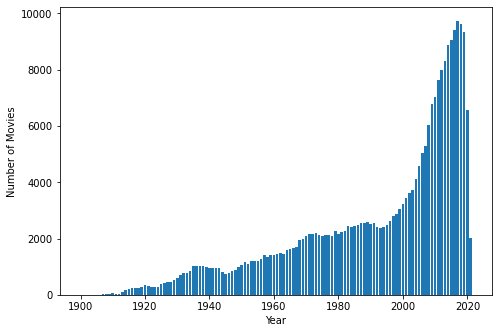

In [64]:
img = io.BytesIO()
bar_graph(movies_count['startYear'], movies_count['titleType'], img, "Year", "Number of Movies")
res = base64.b64encode(img.read()).decode("UTF-8")
with open("imdb_bargraph.html", "w") as file:
    file.write('<div><img src="data:image/png;base64,{}"/></div>'.format(res))

#Convert these files into PDF without using a browser

In [65]:
import pdfcrowd

In [66]:
client = pdfcrowd.HtmlToPdfClient('demo', 'ce544b6ea52a5621fb9d55f8b542d14d')
client.convertFileToFile('imdb_bargraph.html', 'imdb_bargraph.pdf')